In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
data = pd.read_csv('/Users/evanfrench/Desktop/python_revisited/Stock_Price_Data/FB.csv')

In [11]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-07-05,31.320000,31.629999,31.020000,31.469999,31.469999,10032100
1,2012-07-06,31.440001,31.900000,31.260000,31.730000,31.730000,10945600
2,2012-07-09,32.099998,32.880001,31.990000,32.169998,32.169998,17785200
3,2012-07-10,32.430000,32.480000,31.160000,31.469999,31.469999,14269500
4,2012-07-11,31.480000,31.559999,30.549999,30.969999,30.969999,13030300


In [12]:
data['MA 100'] = data['Adj Close'].rolling(window=100).mean()
data['MA 30'] = data['Adj Close'].rolling(window=30).mean()

In [13]:
data.dropna(inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA 100,MA 30
99,2012-11-27,26.040001,26.500000,25.459999,26.150000,26.150000,85760600,22.3087,21.432333
100,2012-11-28,25.940001,26.490000,25.750000,26.360001,26.360001,49205600,22.2576,21.660333
101,2012-11-29,26.500000,27.520000,26.160000,27.320000,27.320000,88759700,22.2135,21.920333
102,2012-11-30,27.260000,28.000000,26.760000,28.000000,28.000000,127049600,22.1718,22.204333
103,2012-12-03,28.000000,28.879999,26.980000,27.040001,27.040001,123526100,22.1275,22.443000


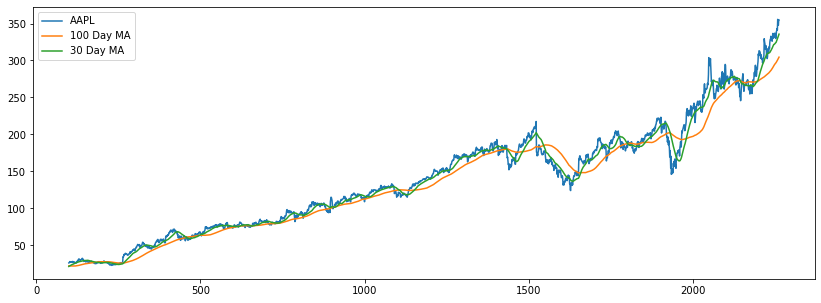

In [14]:
plt.figure(figsize=(14,5))
plt.plot(data['Adj Close'],label='AAPL')

plt.plot(data['MA 100'], label='100 Day MA')
plt.plot(data['MA 30'], label='30 Day MA')
plt.legend(loc='upper left');
plt.show()

In [15]:
# Create a new dataframe to store all of the data

In [16]:
df = pd.DataFrame()
df.head()

df['Adj Close'] = data['Adj Close']
df['MA 100'] = data['MA 100']
df['MA 30'] = data['MA 30']
df = df.reset_index(drop=True)

In [17]:
df.head()

,Adj Close,MA 100,MA 30
0,26.150000,22.3087,21.432333
1,26.360001,22.2576,21.660333
2,27.320000,22.2135,21.920333
3,28.000000,22.1718,22.204333
4,27.040001,22.1275,22.443000


In [18]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA 100,MA 30
99,2012-11-27,26.040001,26.500000,25.459999,26.150000,26.150000,85760600,22.3087,21.432333
100,2012-11-28,25.940001,26.490000,25.750000,26.360001,26.360001,49205600,22.2576,21.660333
101,2012-11-29,26.500000,27.520000,26.160000,27.320000,27.320000,88759700,22.2135,21.920333
102,2012-11-30,27.260000,28.000000,26.760000,28.000000,28.000000,127049600,22.1718,22.204333
103,2012-12-03,28.000000,28.879999,26.980000,27.040001,27.040001,123526100,22.1275,22.443000


In [20]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['MA 30'][i] > data['MA 100'][i]:
            if flag != 1:
                sigPriceBuy.append(df['Adj Close'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['MA 30'][i] < data['MA 100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Adj Close'][i])
                flag = 0
                
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return(sigPriceBuy,sigPriceSell)

buy_sell = buy_sell(df)

In [21]:
# Store the buy and sell data into a variable

In [22]:
df['Buy_Signal_Price'] = buy_sell[0]
df['Sell_Signal_Price'] = buy_sell[1]

In [23]:
df.head()

,Adj Close,MA 100,MA 30,Buy_Signal_Price,Sell_Signal_Price
0,26.150000,22.3087,21.432333,NaN,26.15
1,26.360001,22.2576,21.660333,NaN,NaN
2,27.320000,22.2135,21.920333,NaN,NaN
3,28.000000,22.1718,22.204333,28.0,NaN
4,27.040001,22.1275,22.443000,NaN,NaN


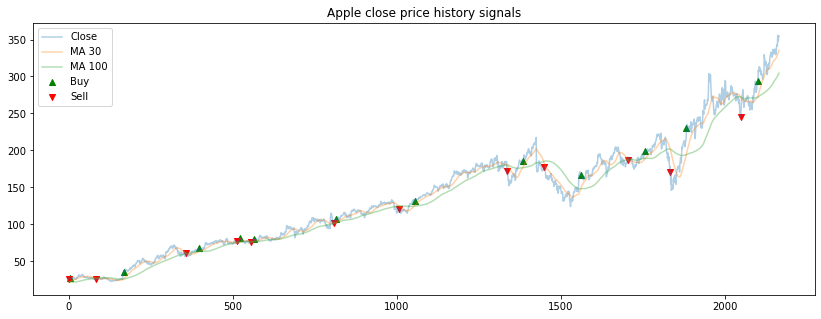

In [24]:
# Vizualize

plt.figure(figsize=(14,5))
plt.plot(df['Adj Close'],label='Close',alpha=0.35)
plt.plot(df['MA 30'],label='MA 30',alpha=0.35)
plt.plot(df['MA 100'],label='MA 100', alpha=0.35)

plt.scatter(df.index, df['Buy_Signal_Price'],label='Buy',marker='^',c='g')
plt.scatter(df.index, df['Sell_Signal_Price'],label='Sell',marker='v',c='r')


plt.legend(loc='upper left')
plt.title('Apple close price history signals');